<a href="https://colab.research.google.com/github/mjgpinheiro/Physics_models/blob/main/Wigner_function.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

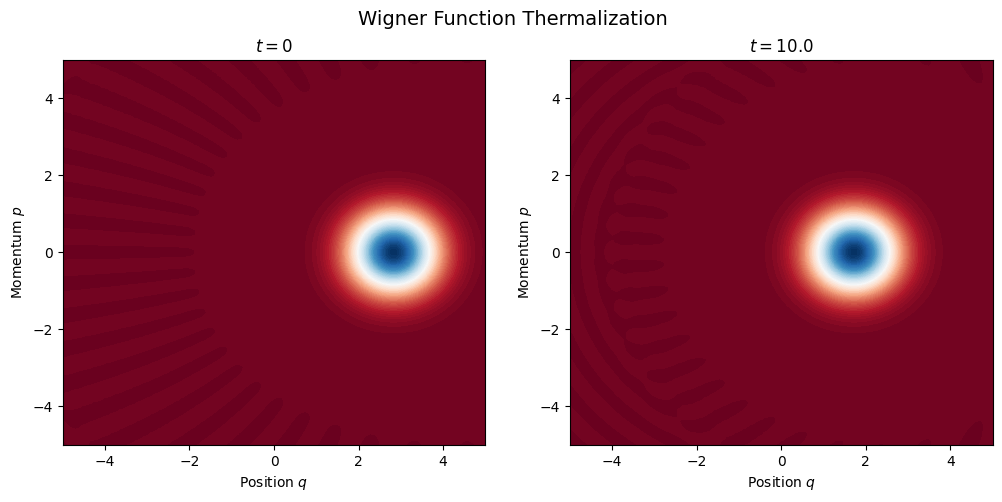

In [5]:
!pip install qutip

# %% [markdown]
# ## Figure 8: Quantum Thermalization (Wigner Function)
# **Purpose**: Simulate entropy-driven thermalization of a quantum state using QuTiP.

# %%
!pip install qutip  # Ensure QuTiP is installed
import numpy as np
import matplotlib.pyplot as plt
import qutip
from qutip import wigner, coherent, mesolve, destroy, qeye

# Quantum parameters
N = 32              # Hilbert space dimension
alpha = 2.0         # Coherent state amplitude
gamma = 0.1         # Dissipation rate
t_list = np.linspace(0, 10, 100)  # Time points

# Initial state (coherent state)
psi0 = coherent(N, alpha)

# Entropy-driven Lindblad operators (dissipation)
a = destroy(N)
H = qeye(N) * 0     # Zero Hamiltonian (as a Qobj)
c_ops = [np.sqrt(gamma) * a]

# Solve master equation
result = mesolve(H, psi0, t_list, c_ops, [])

# Plot Wigner function at t=0 and t=10
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Initial Wigner function
W0 = wigner(result.states[0], x, y)
axes[0].contourf(x, y, W0, 100, cmap='RdBu')
axes[0].set_title("$t=0$", fontsize=12)

# Final Wigner function
W_final = wigner(result.states[-1], x, y)
axes[1].contourf(x, y, W_final, 100, cmap='RdBu')
axes[1].set_title(f"$t={t_list[-1]}$", fontsize=12)

for ax in axes:
    ax.set_xlabel("Position $q$", fontsize=10)
    ax.set_ylabel("Momentum $p$", fontsize=10)

plt.suptitle("Wigner Function Thermalization", fontsize=14)
plt.savefig("figure8_wigner.pdf", bbox_inches='tight')
plt.show()